In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


# Assingnment 1
In this assignment your task is to predict the price of Flight tickets. You will be provided with a training dataset and a test dataset. The labels for the test dataset will remain hidden and your task is to submit predictions for the same. The assignment will be conducted on the Kaggle Platform

In [57]:
#Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,ShuffleSplit,cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

In [58]:
train = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")

test = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")

submission = pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv')

In [59]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

# **Explanatory Data Analysis(EDA)**

In [60]:
train.columns

Index(['id', 'airline', 'flight', 'source', 'departure', 'stops', 'arrival',
       'destination', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [61]:
train.dtypes

id               int64
airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
price            int64
dtype: object

In [62]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


In [63]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [64]:
train.describe()


,id,duration,days_left,price
count,40000.00000,36987.000000,35562.000000,40000.00000
mean,19999.50000,12.004088,26.197936,20801.49025
std,11547.14972,7.108063,13.469232,22729.14842
min,0.00000,0.830000,1.000000,1105.00000
25%,9999.75000,6.670000,15.000000,4687.00000
50%,19999.50000,11.080000,26.000000,7353.00000
75%,29999.25000,15.920000,38.000000,42521.00000
max,39999.00000,47.080000,49.000000,114704.00000


In [65]:
train.describe(include='object')

,airline,flight,source,departure,stops,arrival,destination,class
count,35387,40000,40000,35208,37681,40000,40000,40000
unique,6,869,6,6,3,6,6,2
top,Vistara,0.00E+00,Delhi,Morning,one,Night,Mumbai,Economy
freq,15063,5240,8189,8302,31439,12348,7821,27536


In [66]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (40000, 12)
Test shape: (10000, 11)


# **Check the missing value**

In [67]:
train.isnull().sum()


id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64

In [68]:
def fix_missing_airlines(df):    
  # Fill missing 'airline' values based on 'flight' starting patterns
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('6.00')), 'airline'] = 'Indigo'
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('UK')), 'airline'] = 'Vistara'
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('AI')), 'airline'] = 'Air_India'
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('I5')), 'airline'] = 'AirAsia'
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('G8')), 'airline'] = 'GO_FIRST'
  df.loc[(df['airline'].isna()) & (df['flight'].str.startswith('SG')), 'airline'] = 'SpiceJet'

fix_missing_airlines(train)

In [69]:
from sklearn.impute import SimpleImputer
def handle_missing_values(df):
    num_si=SimpleImputer(strategy='median')
    cat_si=SimpleImputer(strategy='most_frequent')
    df['duration']=num_si.fit_transform(df[['duration']]).ravel()
    df['days_left']=num_si.fit_transform(df[['days_left']]).ravel()
    df['airline']=cat_si.fit_transform(df[['airline']]).ravel()
    df['stops']=cat_si.fit_transform(df[['stops']]).ravel()
    df['departure']=cat_si.fit_transform(df[['departure']]).ravel()

handle_missing_values(train)

In [70]:
train.isna().sum()

id             0
airline        0
flight         0
source         0
departure      0
stops          0
arrival        0
destination    0
class          0
duration       0
days_left      0
price          0
dtype: int64

# Handle duplicates

In [71]:
print("Number of duplicate rows:", train.duplicated().sum())

Number of duplicate rows: 0


In [72]:
train['airline'].value_counts()

airline
Vistara      17639
Air_India    10425
Indigo        5315
GO_FIRST      3169
AirAsia       2205
SpiceJet      1247
Name: count, dtype: int64

In [73]:
train['stops'].value_counts()

stops
one            33758
zero            4741
two_or_more     1501
Name: count, dtype: int64

In [74]:
train['class'].value_counts()

class
Economy     27536
Business    12464
Name: count, dtype: int64

# Identify and handle outliers

In [75]:
for col in ['price', 'duration', 'days_left']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_limit) | (train[col] > upper_limit)]
    print(f"Number of outliers in {col}:", outliers.shape[0])

Number of outliers in price: 14
Number of outliers in duration: 470
Number of outliers in days_left: 0


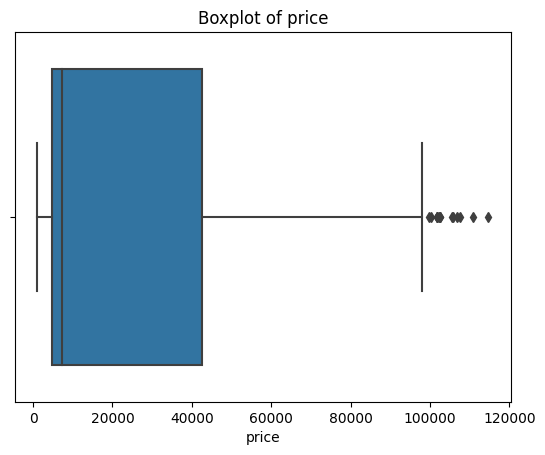

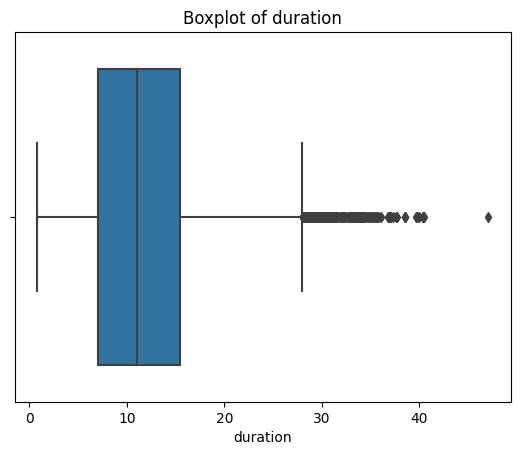

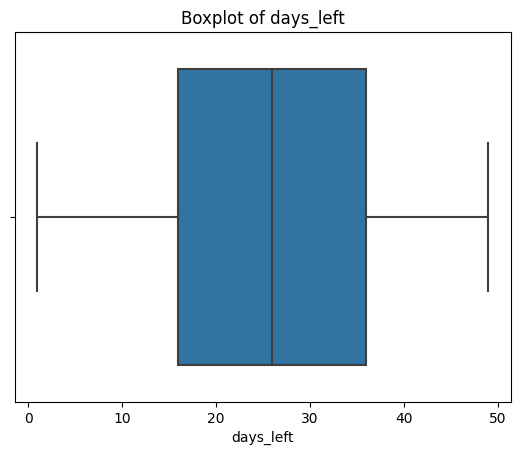

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['price', 'duration', 'days_left']:
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# **Dropping outliers**

In [77]:
for col in ['price', 'duration', 'days_left']:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_limit) & (train[col] <= upper_limit)]


In [78]:
train.describe()

,id,duration,days_left,price
count,39517.000000,39517.000000,39517.000000,39517.000000
mean,20007.458916,11.710815,26.205355,20783.694967
std,11552.980824,6.558970,12.689687,22719.536177
min,0.000000,0.830000,1.000000,1105.000000
25%,9992.000000,6.920000,16.000000,4672.000000
50%,20015.000000,11.080000,26.000000,7293.000000
75%,30022.000000,15.170000,36.000000,42521.000000
max,39999.000000,28.000000,49.000000,97905.000000


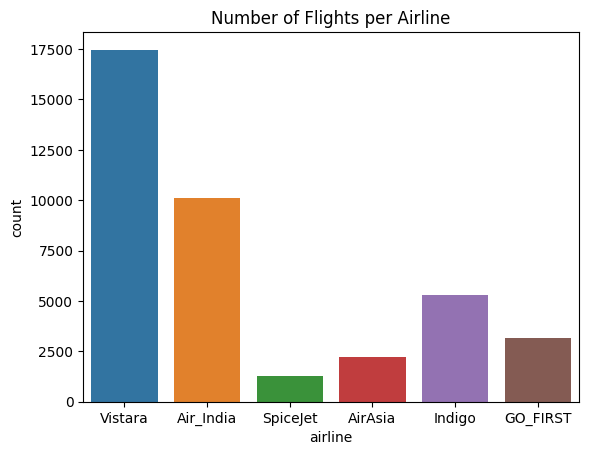

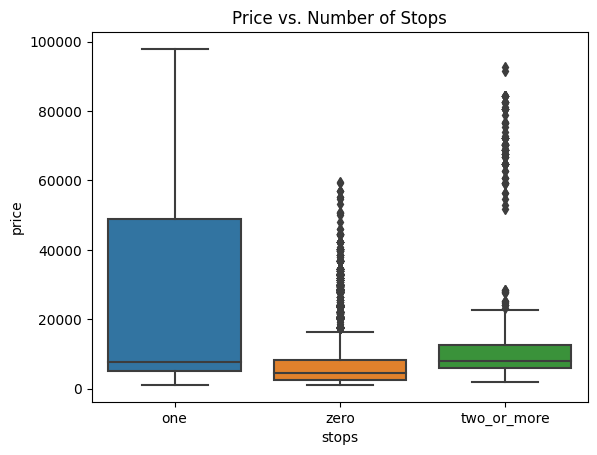

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


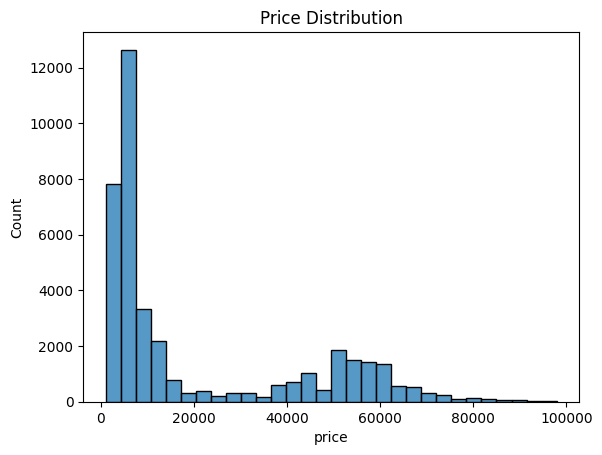

In [79]:
# Bar plot: Flights per airline
sns.countplot(x='airline', data=train)
plt.title('Number of Flights per Airline')
plt.show()

# Box plot: Price vs. Stops
sns.boxplot(x='stops', y='price', data=train)
plt.title('Price vs. Number of Stops')
plt.show()

# Histogram: Price distribution
sns.histplot(train['price'], bins=30)
plt.title('Price Distribution')
plt.show()

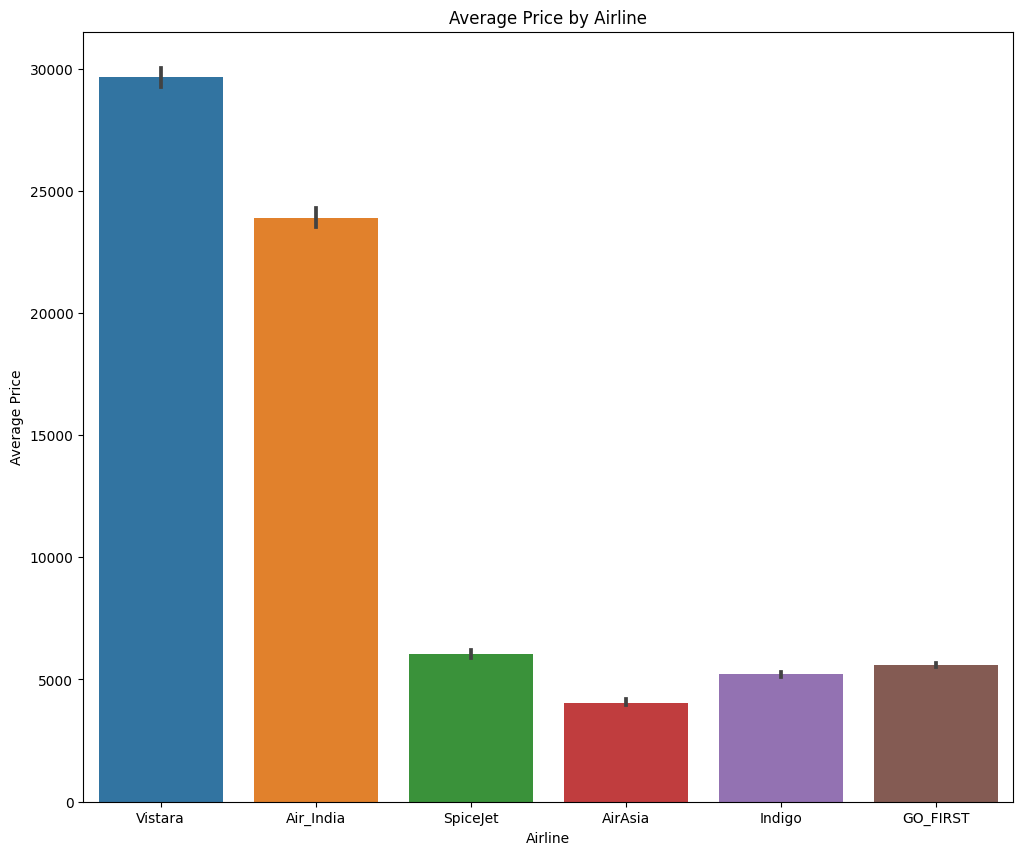

In [80]:
# Plot 2: shows mean price per airline
plt.figure(figsize=(12, 10))
sns.barplot(x='airline', y='price', data=train, estimator='mean')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

# Scale Numerical features and Encode Categorical features

In [81]:
X=train.drop(columns='price',axis=1)
y=train['price']

cat_cols=X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['int64','float64']).columns

num_pipeline=Pipeline([
    ('scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('encoder',OneHotEncoder(handle_unknown='ignore')),
])

preprocessor=ColumnTransformer([
    ('num',num_pipeline,num_cols),
    ('cat',cat_pipeline,cat_cols)
])

X_train_raw, X_test_raw, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

preprocessor.fit(X_train_raw)
X_train= preprocessor.transform(X_train_raw)
X_test= preprocessor.transform(X_test_raw)

# Model Building

In [82]:
#Model 1 : Linear Regression
lin_reg=LinearRegression()
lin_reg_score=cross_validate(lin_reg,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("Linear Regressor Train Score",f"{lin_reg_score['train_score'].mean():.3f}")
print("Linear Regressor Test Score",f"{lin_reg_score['test_score'].mean():.3f}")

Linear Regressor Train Score 0.925
Linear Regressor Test Score 0.921


In [83]:
#Model 2 : Ridge Regression
ridge = Ridge()
ridge_score=cross_validate(ridge,X_train.toarray(),y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("Ridge Regressor Train Score",f"{ridge_score['train_score'].mean():.3f}")
print("Ridge Regressor Test Score",f"{ridge_score['test_score'].mean():.3f}")

Ridge Regressor Train Score 0.925
Ridge Regressor Test Score 0.921


In [84]:
#Model 3 : XGBoost
xgb = XGBRegressor(random_state=42)
xgb_score=cross_validate(xgb,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("XGBoost Regressor Train Score",f"{xgb_score['train_score'].mean():.3f}")
print("XGBoost Regressor Test Score",f"{xgb_score['test_score'].mean():.3f}")

XGBoost Regressor Train Score 0.979
XGBoost Regressor Test Score 0.972


In [85]:
#Model 4 : GradientBoost Regression
gb_reg=GradientBoostingRegressor(random_state=42)
gb_reg_score=cross_validate(gb_reg,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("GradientBoost Regressor Train Score",f"{gb_reg_score['train_score'].mean():.3f}")
print("GradientBoost Regressor Test Score",f"{gb_reg_score['test_score'].mean():.3f}")

GradientBoost Regressor Train Score 0.953
GradientBoost Regressor Test Score 0.952


In [86]:
#Model 5 : AdaBoost Regression
ada=AdaBoostRegressor()
ada_score=cross_validate(ada,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("AdaBoost Regressor Train Score",f"{ada_score['train_score'].mean():.3f}")
print("AdaBoost Regressor Test Score",f"{ada_score['test_score'].mean():.3f}")

AdaBoost Regressor Train Score 0.929
AdaBoost Regressor Test Score 0.927


In [87]:
#Model 6 : LightGBM Regressor
lgbm = LGBMRegressor(random_state=42, verbose=-1)
lgbm_score=cross_validate(lgbm,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("LightGBM Regressor Train Score",f"{lgbm_score['train_score'].mean():.3f}")
print("LightGBM Regressor Test Score",f"{lgbm_score['train_score'].mean():.3f}")

LightGBM Regressor Train Score 0.975
LightGBM Regressor Test Score 0.975


In [ ]:
#Model 7 : KNNeighbors
knn = KNeighborsRegressor()
knn_score=cross_validate(knn,X_train,y_train,scoring='r2',cv=cv,return_train_score=True,return_estimator=True)
print("KNNeighbors Train Score",f"{knn_score['train_score'].mean():.3f}")
print("KNNeighbors Test Score",f"{knn_score['test_score'].mean():.3f}")

In [ ]:
#HyperParameter Tuning 1 : XGBoost Regressor
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 3, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=cv,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train, y_train)

print("Best params:", xgb_search.best_params_)
print("Best mean CV R2:", round(xgb_search.best_score_, 3))

y_xgb_pred = xgb_search.best_estimator_.predict(X_test)
test_xgb = r2_score(y_test, y_xgb_pred)
print("Test R2:", round(test_xgb, 3))

In [ ]:
#HyperParameter Tuning 2 : GradientBoost Regressor
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}

gb_search = RandomizedSearchCV(
    estimator=gb_reg,
    param_distributions=param_grid,
    n_iter=20,               
    scoring='r2',
    cv=cv,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)

gb_search.fit(X_train, y_train)

print("Best params:", gb_search.best_params_)
print("Best mean CV R2:", round(gb_search.best_score_, 3))

y_gb_pred = gb_search.best_estimator_.predict(X_test)
print("Test R2:", round(r2_score(y_test, y_gb_pred), 3))

In [ ]:
#HyperParameter Tuning 3 : LIGHTGBM Regressor
param_grid = {
    'num_leaves': [15, 30, 40],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 1000],
    'min_child_samples': [5, 10, 20]
}

lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=cv,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)

lgbm_search.fit(X_train, y_train)

print("Best params:", lgbm_search.best_params_)
print("Best mean CV R2:", round(lgbm_search.best_score_, 3))

y_lgbm_pred = lgbm_search.best_estimator_.predict(X_test)
print("Test R2:", round(r2_score(y_test, y_lgbm_pred), 3))

In [ ]:
X_train.shape


In [ ]:
fix_missing_airlines(test)
handle_missing_values(test)

In [ ]:
X_external_test_processed = preprocessor.transform(test)
y_external_pred =lgbm_search.best_estimator_.predict(X_external_test_processed)

In [ ]:
print(len(y_external_pred), len(submission))

In [ ]:
submission['price'] = y_external_pred
submission.to_csv('submission.csv', index=False)